In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
baseline = pd.read_csv('baselines.csv')

# Checking Baseline data

In [11]:
baseline.head()

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,...,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event
0,655528,62.321679,Male,20.388645,No,No,No,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,8,No,Yes
1,729545,78.625586,Female,27.554594,Yes,No,Yes,Yes,Unchecked,Unchecked,...,Checked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,20,Yes,Yes
2,805568,70.460677,Female,34.141729,Yes,No,Yes,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,9,No,No
3,895876,59.043149,Male,19.833296,Yes,Yes,Yes,No,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,7,No,No
4,905164,90.477229,Male,19.858003,No,No,Yes,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,25,Yes,No


In [480]:
baseline[baseline.isnull().any(axis=1)]

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,...,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event


In [481]:
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 27 columns):
mrn                             1345 non-null int64
Age                             1345 non-null float64
sex.factor                      1345 non-null object
bmi                             1345 non-null float64
hypoxia_ed.factor               1345 non-null object
smoke_vape                      1345 non-null object
dm.factor                       1345 non-null object
htn.factor                      1345 non-null object
pulm___1.factor                 1345 non-null object
renal___1.factor                1345 non-null object
renal___2.factor                1345 non-null object
cad.factor                      1345 non-null object
cancer                          1345 non-null object
any_immunosuppression           1345 non-null object
symptoms___1.factor             1345 non-null object
symptoms___2.factor             1345 non-null object
symptoms___10.factor            1345 non-nul

# Observing the categorical columns 

In [482]:
obj_df = baseline.select_dtypes(include=['object']).copy()
obj_df.head()

,sex.factor,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,cad.factor,cancer,...,symptoms___10.factor,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,Ed_before_order_set,event
0,Male,No,No,No,Yes,Unchecked,Unchecked,Unchecked,No,No,...,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,No,Yes
1,Female,Yes,No,Yes,Yes,Unchecked,Unchecked,Unchecked,No,No,...,Unchecked,Checked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,Yes,Yes
2,Female,Yes,No,Yes,Yes,Unchecked,Unchecked,Unchecked,Yes,No,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,No,No
3,Male,Yes,Yes,Yes,No,Unchecked,Unchecked,Unchecked,Yes,No,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,No,No
4,Male,No,No,Yes,Yes,Unchecked,Unchecked,Unchecked,No,No,...,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,Yes,No


# Splitting train test data 

In [483]:
def split_train_test_data(df):
    X = df.drop(['mrn' , 'event'],axis=1)
    y = df['event']
    
    test_size = 0.2
    seed = 7
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    
    df_train = pd.concat([X_train,y_train],axis = 1)
    df_train.index = range(len(df_train.index))

    df_test = pd.concat([X_test,y_test],axis = 1)
    df_test.index = range(len(df_test.index))

    return df_train , df_test
    

In [484]:
baseline_train , baseline_test = split_train_test_data(df = baseline)

# Converting categorical columns to code based data 

In [485]:
cat_columns = baseline_train.select_dtypes(['object']).columns
baseline_train[cat_columns] = baseline_train[cat_columns].astype('category')
baseline_train[cat_columns] = baseline_train[cat_columns].apply(lambda x: x.cat.codes)

cat_columns = baseline_test.select_dtypes(['object']).columns
baseline_test[cat_columns] = baseline_test[cat_columns].astype('category')
baseline_test[cat_columns] = baseline_test[cat_columns].apply(lambda x: x.cat.codes)

In [486]:
baseline_train.head()

,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,...,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event
0,91.059592,1,23.886927,1,0,0,1,1,1,1,...,1,1,0,1,1,0,1,9,0,1
1,86.181117,0,20.792213,1,0,0,0,1,1,1,...,1,1,0,1,1,0,1,32,1,0
2,62.796775,1,23.971563,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,15,0,0
3,25.613678,1,32.142129,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,19,0,1
4,82.590650,0,40.318233,1,0,1,0,1,1,1,...,1,1,1,1,1,0,1,18,1,0


# EDA of training data

In [487]:
baseline_train.nunique(axis=0)

Age                             1076
sex.factor                         2
bmi                             1076
hypoxia_ed.factor                  2
smoke_vape                         2
dm.factor                          2
htn.factor                         2
pulm___1.factor                    2
renal___1.factor                   2
renal___2.factor                   2
cad.factor                         2
cancer                             2
any_immunosuppression              2
symptoms___1.factor                2
symptoms___2.factor                2
symptoms___10.factor               2
symptoms___9.factor                2
symptoms___8.factor                2
symptoms___3.factor                2
first_cxr_results___0.factor       2
first_cxr_results___1.factor       2
first_cxr_results___2.factor       2
first_cxr_results___3.factor       2
duration_symptoms                 35
Ed_before_order_set                2
event                              2
dtype: int64

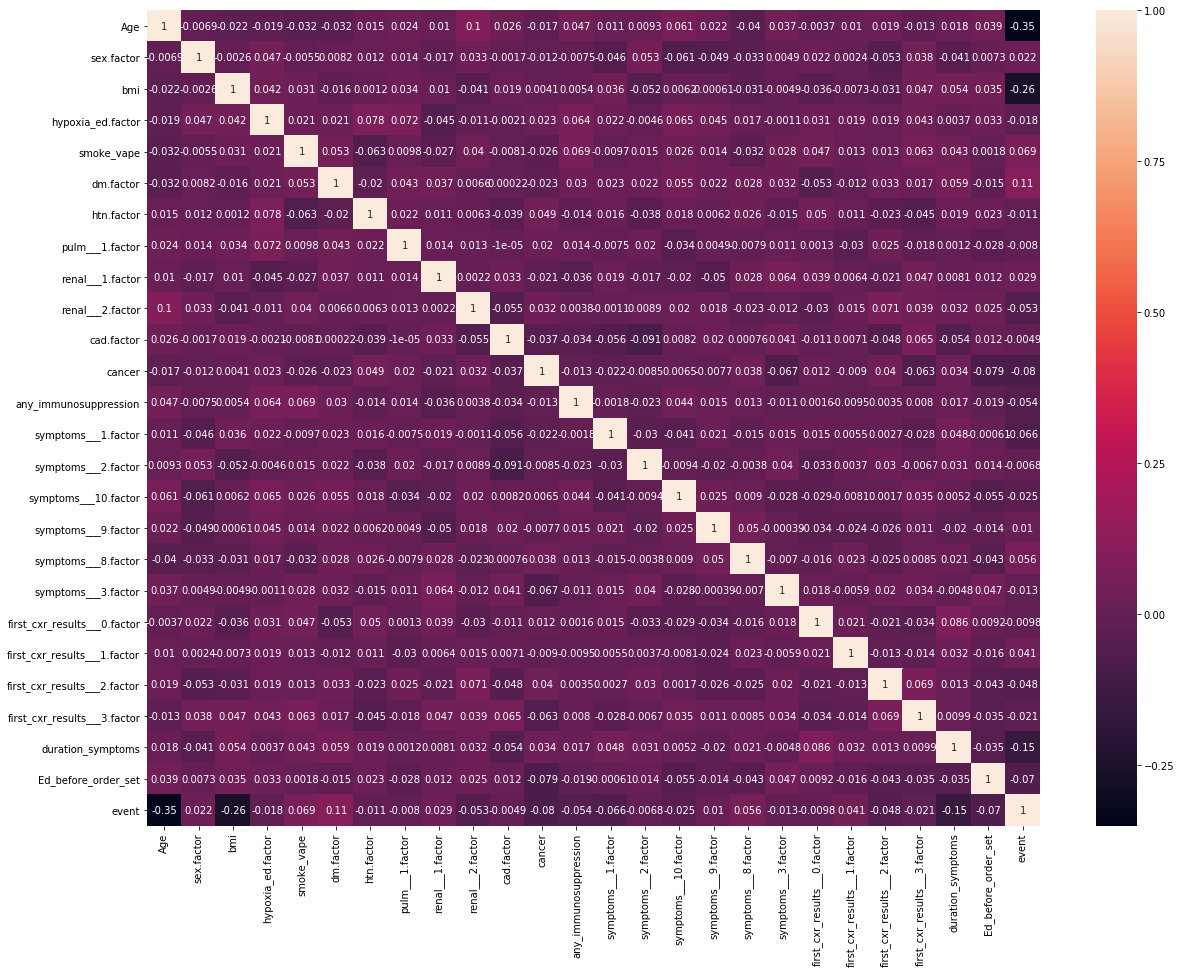

In [488]:
plt.figure(figsize=(20,15))
sns.heatmap(baseline_train.corr() ,annot=True)

# Exploring relation between important features such as age , bmi , cancer , CAD and how they affect death scenario

Mean Age of people who died 71.45629829730825
Median Age of people who died 73.68187999391876


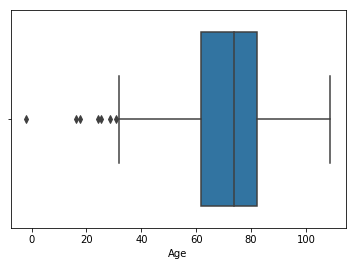

In [489]:
sns.boxplot(baseline_train[baseline_train['event'] == 0]['Age'])
print('Mean Age of people who died',baseline_train[baseline_train['event'] == 0]['Age'].mean())
print('Median Age of people who died',baseline_train[baseline_train['event'] == 0]['Age'].median())

Mean Age of people who did not die 59.342505444104965
Median Age of people who did not die 59.606139539055604


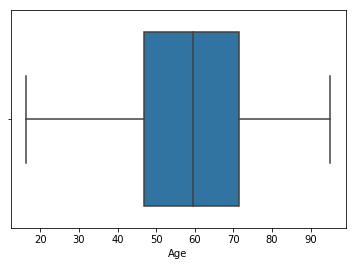

In [491]:
sns.boxplot(baseline_train[baseline_train['event'] == 1]['Age'])
print('Mean Age of people who did not die',baseline_train[baseline_train['event'] == 1]['Age'].mean())
print('Median Age of people who did not die',baseline_train[baseline_train['event'] == 1]['Age'].median())

In [492]:
print('% of male who died',baseline_train[(baseline_train['event'] == 0) &(baseline_train['sex.factor'] == 1)]['sex.factor'].count()/baseline_train[baseline_train['sex.factor'] == 1]['sex.factor'].count() *100)
print('% of female who died',baseline_train[(baseline_train['event'] == 0) &(baseline_train['sex.factor'] == 0)]['sex.factor'].count() / baseline_train[baseline_train['sex.factor'] == 0]['sex.factor'].count()*100)

% of male who died 51.76848874598071
% of female who died 53.964757709251096


Avg duration of symptoms for patients that died 9.599647266313934


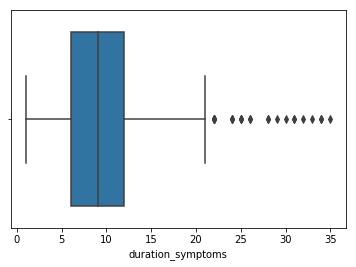

In [493]:
sns.boxplot(baseline_train[baseline_train['event'] == 0]['duration_symptoms'])
print('Avg duration of symptoms for patients that died',baseline_train[baseline_train['event'] == 0]['duration_symptoms'].mean())

Avg duration of symptoms for patients that did not die 8.072691552062869


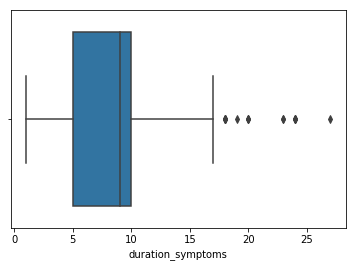

In [494]:
sns.boxplot(baseline_train[baseline_train['event'] == 1]['duration_symptoms'])
print('Avg duration of symptoms for patients that did not die',baseline_train[baseline_train['event'] == 1]['duration_symptoms'].mean())

Mean BMI of patients who died 29.488429774651696


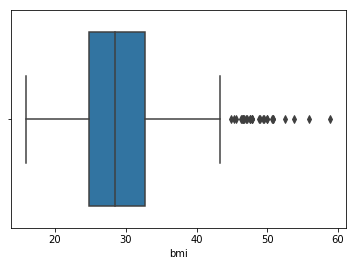

In [495]:
sns.boxplot(baseline_train[baseline_train['event'] == 0]['bmi'])
print('Mean BMI of patients who died',baseline_train[baseline_train['event'] == 0]['bmi'].mean())

Mean BMI of patients who did not die 26.120857996261705


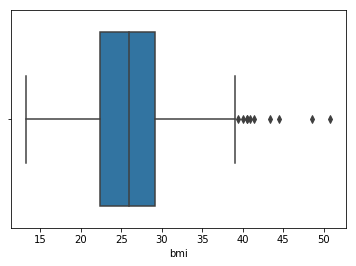

In [496]:
sns.boxplot(baseline_train[baseline_train['event'] == 1]['bmi'])
print('Mean BMI of patients who did not die',baseline_train[baseline_train['event'] == 1]['bmi'].mean())

In [497]:
print('People who had cancer and died',baseline_train[(baseline_train['event'] == 0) & (baseline_train['cancer'] == 1)]['event'].count())
print('People who had cancer and did not die',baseline_train[(baseline_train['event'] == 1) & (baseline_train['cancer'] == 1)]['event'].count())

People who had cancer and died 57
People who had cancer and did not die 29


In [498]:
print('People who had CAD and died',baseline_train[(baseline_train['event'] == 0) & (baseline_train['cad.factor'] == 1)]['cad.factor'].count())
print('People who had CAD and did not die',baseline_train[(baseline_train['event'] == 1) & (baseline_train['cad.factor'] == 1)]['cad.factor'].count())

People who had CAD and died 108
People who had CAD and did not die 95


In [499]:
print('People who did not die had shown symptoms for an average of ',baseline_train[baseline_train['event'] == 1]['duration_symptoms'].mean() , ' days')
print('People who died had shown symptoms for an average of ',baseline_train[baseline_train['event'] == 0]['duration_symptoms'].mean() , ' days')      

People who did not die had shown symptoms for an average of  8.072691552062869  days
People who died had shown symptoms for an average of  9.599647266313934  days


# Removing Outliers based on Age ,BMI , Symptoms Duration

In [500]:
min_thresold = baseline_train['Age'].quantile(0.05)
max_thresold = baseline_train['Age'].quantile(0.95)
baseline_train[(baseline_train['Age']<max_thresold) & (baseline_train['Age']>min_thresold)]

min_thresold = baseline_train['bmi'].quantile(0.05)
max_thresold = baseline_train['bmi'].quantile(0.95)
baseline_train[(baseline_train['bmi']<max_thresold) & (baseline_train['bmi']>min_thresold)]

min_thresold = baseline_train['duration_symptoms'].quantile(0.05)
max_thresold = baseline_train['duration_symptoms'].quantile(0.95)
baseline_train[(baseline_train['duration_symptoms']<max_thresold) & (baseline_train['duration_symptoms']>min_thresold)]

,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,...,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event
0,91.059592,1,23.886927,1,0,0,1,1,1,1,...,1,1,0,1,1,0,1,9,0,1
2,62.796775,1,23.971563,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,15,0,0
5,78.637506,1,27.991814,0,0,0,1,1,1,1,...,1,1,1,1,1,0,0,3,1,0
6,54.407542,0,28.927962,1,0,0,0,1,1,1,...,1,1,0,1,1,0,1,10,0,1
7,31.228610,1,26.432639,0,0,0,1,1,1,1,...,0,0,1,1,0,0,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,75.614048,1,16.478568,0,0,0,0,1,1,1,...,1,0,1,0,0,1,1,12,0,0
1072,66.719165,0,36.014942,1,0,0,1,1,1,1,...,1,1,1,0,1,0,1,12,0,1
1073,50.260024,1,24.654353,0,1,1,0,1,1,1,...,1,0,1,1,1,0,1,5,1,1
1074,80.104926,0,32.586057,1,0,0,1,1,1,1,...,1,1,1,0,1,0,1,9,0,1


# Combining Visible Features and Lab Results in a single column

From above observations , we can infer that:
old people are at higher risk as compared to younger ones
People having higher BMI are at more risk than people having low BMI.
People suffering from Cancer or CAD are at more risk than people not suffering from these diseases.
There is no significant gender based risk.
People who died had been showing symptoms for a longer duration than those who survived.

In [501]:
def combine_multiple_similar_features(df_train,df_test):

    df_train['visible_symptoms'] = (df_train['symptoms___1.factor']
                                    + df_train['symptoms___2.factor']
                                    + df_train['symptoms___3.factor']
                                    + df_train['symptoms___8.factor']
                                    + df_train['symptoms___9.factor']
                                    + df_train['symptoms___10.factor'])
    
    df_train['Combined_Lung_Infections'] = (df_train['first_cxr_results___1.factor']
                                        + df_train['first_cxr_results___2.factor']
                                        + df_train['first_cxr_results___3.factor'])
    
    df_train['kidney_damage'] = (df_train['renal___1.factor'] + df_train['renal___2.factor'])
    
    df_train = df_train.drop(['symptoms___1.factor', 'symptoms___2.factor' , 'symptoms___3.factor' , 'symptoms___8.factor'
                             ,'symptoms___9.factor' , 'symptoms___10.factor','first_cxr_results___1.factor', 'first_cxr_results___2.factor'
                             ,'first_cxr_results___3.factor' , 'renal___1.factor', 'renal___2.factor'], axis =1)
    
    
    df_test['visible_symptoms'] = (df_test['symptoms___1.factor']
                                    + df_test['symptoms___2.factor']
                                    + df_test['symptoms___3.factor']
                                    + df_test['symptoms___8.factor']
                                    + df_test['symptoms___9.factor']
                                    + df_test['symptoms___10.factor'])
    
    df_test['Combined_Lung_Infections'] = (df_test['first_cxr_results___1.factor']
                                        + df_test['first_cxr_results___2.factor']
                                        + df_test['first_cxr_results___3.factor'])
    
    df_test['kidney_damage'] = (df_test['renal___1.factor'] + df_test['renal___2.factor'])
    
    df_test = df_test.drop(['symptoms___1.factor', 'symptoms___2.factor' , 'symptoms___3.factor' , 'symptoms___8.factor'
                             ,'symptoms___9.factor' , 'symptoms___10.factor','first_cxr_results___1.factor', 'first_cxr_results___2.factor'
                             ,'first_cxr_results___3.factor' , 'renal___1.factor', 'renal___2.factor'], axis =1)
    
    return df_train , df_test    

In [502]:
baseline_train , baseline_test = combine_multiple_similar_features(df_train = baseline_train ,df_test = baseline_test)

# Binning age , bmi , symptoms duration to categorical data to reduce noise

In [503]:
baseline_train['Age'] = pd.cut(x = baseline_train['Age'], bins=[9,19,29,39,49,59,69,79,89,99, 109 , 119] , labels=[10,20,30,40,50,60,70,80,90,100,110])
baseline_train['bmi'] = pd.cut(x = baseline_train['bmi'], bins = [9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59], labels = [10,15,20,25,30,35,40,45,50,55])
baseline_train['duration_symptoms'] = pd.cut(x = baseline_train['duration_symptoms'], bins = [7, 14, 21, 28, 35,], labels = [1,2,3,4])
    
baseline_test['Age'] = pd.cut(x = baseline_test['Age'], bins=[9,19,29,39,49,59,69,79,89,99, 109 , 119] , labels=[10,20,30,40,50,60,70,80,90,100,110])
baseline_test['bmi'] = pd.cut(x = baseline_test['bmi'], bins = [9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59], labels = [10,15,20,25,30,35,40,45,50,55])
baseline_test['duration_symptoms'] = pd.cut(x = baseline_test['duration_symptoms'], bins = [7, 14, 21, 28, 35,], labels = [1,2,3,4])
    
cat_columns = ['Age' , 'bmi' , 'duration_symptoms']
baseline_train[cat_columns] = baseline_train[cat_columns].apply(lambda x: x.cat.codes)
baseline_test[cat_columns] = baseline_test[cat_columns].apply(lambda x: x.cat.codes)


In [464]:
baseline_train.dtypes

Age                             float64
sex.factor                         int8
bmi                             float64
hypoxia_ed.factor                  int8
smoke_vape                         int8
dm.factor                          int8
htn.factor                         int8
pulm___1.factor                    int8
renal___1.factor                   int8
renal___2.factor                   int8
cad.factor                         int8
cancer                             int8
any_immunosuppression              int8
symptoms___1.factor                int8
symptoms___2.factor                int8
symptoms___10.factor               int8
symptoms___9.factor                int8
symptoms___8.factor                int8
symptoms___3.factor                int8
first_cxr_results___0.factor       int8
first_cxr_results___1.factor       int8
first_cxr_results___2.factor       int8
first_cxr_results___3.factor       int8
duration_symptoms                 int64
Ed_before_order_set                int8


# Modelling the data using classification algorithms

Have used xgboost model to predict people who have died and hence are at more risk and need ventilation. 
Had tried other models but xgboost gives best results in terms of accuracy and recall

Accuracy: 74.35%
auc_score 0.7438356921716055
Average precision-recall score: 0.69


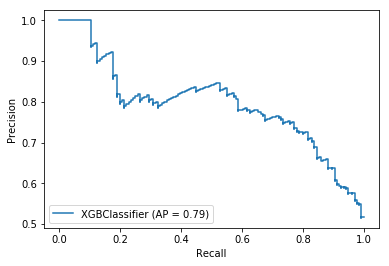

In [504]:
def get_model_results(df_train, df_test):
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    
    seed = 7
    test_size = 0.25
    X_train = df_train.drop(['event'],axis=1)
    y_train = df_train['event']
    
    X_test = df_test.drop(['event'],axis=1)
    y_test = df_test['event']
    
    # fit model no training data
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    cf_matrix = confusion_matrix(y_test, y_pred)
    auc_score = metrics.roc_auc_score(y_test, y_pred)
    print('auc_score',auc_score)
    
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    disp = plot_precision_recall_curve(model, X_test, y_test)

    return cf_matrix

cf_matrix =  get_model_results(df_train = baseline_train_2, df_test = baseline_test_2)

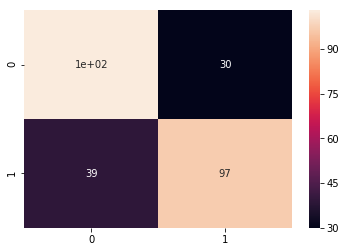

In [505]:
sns.heatmap(cf_matrix, annot=True)

# Using XGboost to get feature importance and using them to improve accuracy

Feature: Age  Score: 0.16973984
Feature: sex.factor  Score: 0.035975922
Feature: bmi  Score: 0.13669997
Feature: hypoxia_ed.factor  Score: 0.06413847
Feature: smoke_vape  Score: 0.057081994
Feature: dm.factor  Score: 0.056373753
Feature: htn.factor  Score: 0.021328794
Feature: pulm___1.factor  Score: 0.02274812
Feature: cad.factor  Score: 0.04063687
Feature: cancer  Score: 0.07569416
Feature: any_immunosuppression  Score: 0.044853125
Feature: first_cxr_results___0.factor  Score: 0.056990497
Feature: duration_symptoms  Score: 0.05716843
Feature: Ed_before_order_set  Score: 0.039093077
Feature: visible_symptoms  Score: 0.038519014
Feature: Combined_Lung_Infections  Score: 0.03652823
Feature: kidney_damage  Score: 0.046429798


<BarContainer object of 17 artists>

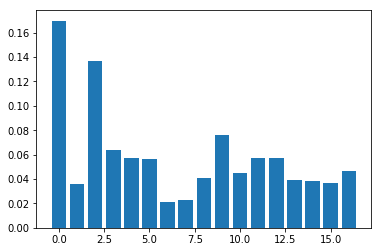

In [506]:
from xgboost import XGBClassifier

X_train = baseline_train.drop(['event'],axis=1)
y_train = baseline_train['event']
features = list(X_train.columns)
model = XGBClassifier()
model.fit(X_train, y_train)

importance = model.feature_importances_
for i in range(len(importance)):
    print('Feature:',features[i]  ,' Score:', importance[i])
plt.bar([x for x in range(len(importance))], importance)

In [507]:
X_train = baseline_train[['Age', 'bmi', 'cancer']]
y_train = baseline_train['event']
    
X_test = baseline_test[['Age', 'bmi', 'cancer']]
y_test = baseline_test['event']
    
    # fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
    # evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cf_matrix = confusion_matrix(y_test, y_pred)
auc_score = metrics.roc_auc_score(y_test, y_pred)
print('auc_score',auc_score)

Accuracy: 75.84%
auc_score 0.7587074303405573


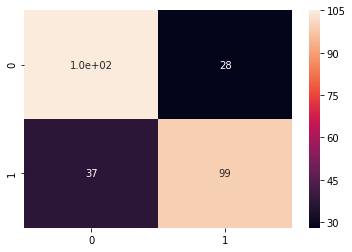

In [508]:
sns.heatmap(cf_matrix, annot=True)